## 1. Import Libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 2. Load the Dataset

In [15]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Omara\Downloads\Live.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 3. Data Cleaning

In [18]:
# Remove unnecessary columns
columns_to_drop = ['status_id', 'status_type', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4']
data_clean = data.drop(columns=columns_to_drop)
data_clean = data_clean.dropna()
data_clean.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [19]:
data_clean.isnull().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## 4. Feature Selection and Scaling

In [6]:
# Select features
X = data_clean.copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Find Optimal Number of Clusters (Elbow Method)

C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\clust

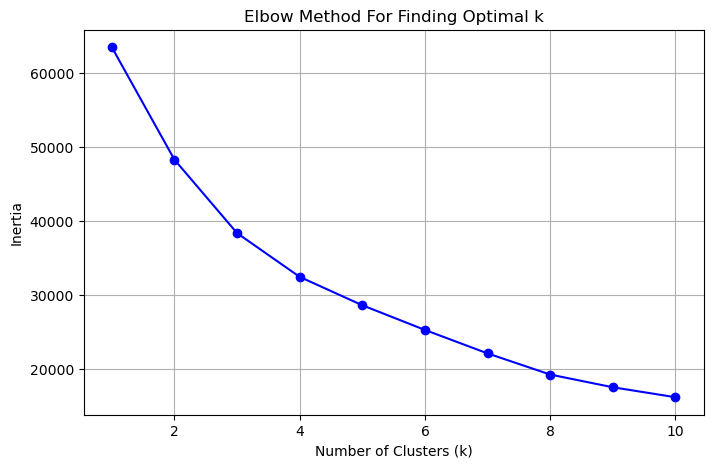

In [20]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Finding Optimal k')
plt.grid()
plt.show()

## 6. Apply KMeans Clustering

In [21]:
# Assume optimal k=3 based on Elbow
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels
data_clean['Cluster'] = y_kmeans
data_clean.head()

C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0


## 7. Visualize the Clusters

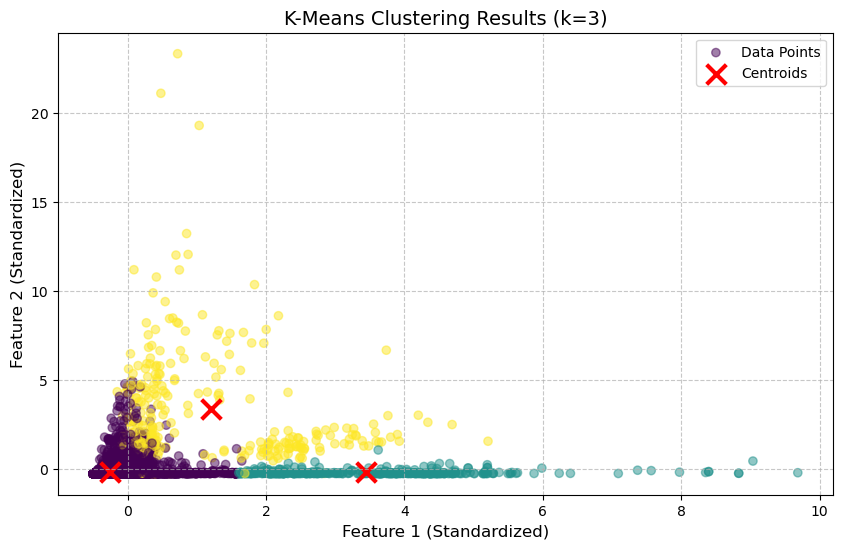

In [28]:
# Predict clusters
labels = y_kmeans  # These are the cluster labels
centroids = kmeans.cluster_centers_

# Bring back centroids to original scale
centroids_original = scaler.inverse_transform(centroids)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel('Feature 1 (Standardized)', fontsize=12)
plt.ylabel('Feature 2 (Standardized)', fontsize=12)
plt.title(f'K-Means Clustering Results (k=3)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('kmeans_results_enhanced.png')
plt.show()


## 8. Analyze Cluster Centers

In [22]:
# Reverse scaling to original values
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centers:")
cluster_centers_df

Cluster Centers:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,113.854489,106.228571,21.711319,105.294770,7.464637,0.549727,0.339578,0.148790,0.054020
1,1823.311828,61.333333,11.645161,1817.534946,3.104839,2.435484,0.198925,0.032258,0.005376
2,786.871795,3217.948718,508.300366,606.293040,149.344322,17.080586,9.747253,2.758242,1.648352


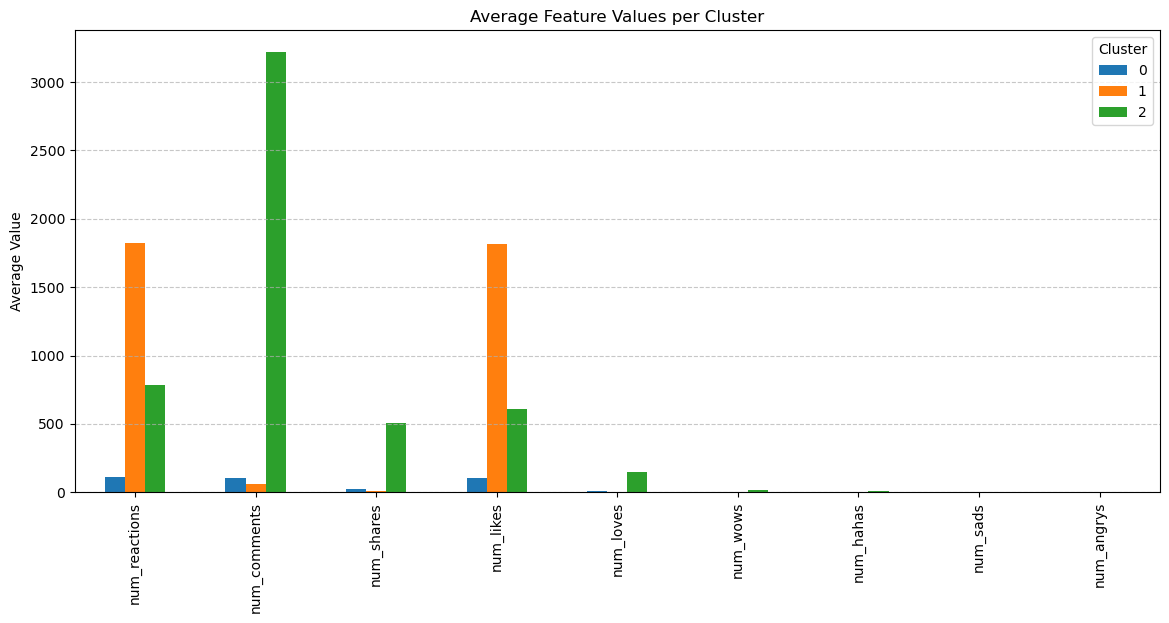

In [30]:
# Calculate mean values for each cluster
cluster_means = data_clean.groupby('Cluster').mean()

# Plot
cluster_means.T.plot(kind='bar', figsize=(14, 6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Average Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Cluster')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score for k=3: {score:.3f}')
############ Best Clustering>>1 ##############

Silhouette Score for k=3: 0.750


## Small Deployment Step

In [33]:
# Example: Predict a new point
new_post = np.array([[500, 100, 80, 680, 400, 20, 30, 10, 5]])  # Example data (needs to match feature order)
new_post_scaled = scaler.transform(new_post)
cluster_pred = kmeans.predict(new_post_scaled)
print(f'The new post is assigned to Cluster {cluster_pred[0]}')


The new post is assigned to Cluster 2


C:\Users\Omara\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
